In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
OUT_FILE_LOC = 'examples/bangor_2015_multilayer/outputs/bangor_wheat/bangor_2015_hb_ww/latest/bangor_2015_hb_ww_out.csv'
nL = 4
nP = 3

In [3]:
df = pd.read_csv(OUT_FILE_LOC)
df.head()

,Unnamed: 0,dd,ts_c,par,lai,sai,dvi,photoperiod,PARsun,PARshade,...,f_LS,LAIsunfrac,component_LAI,V_cmax,J_max,R_d,R_dc,total_emerged_leaves,leaf_pop_distribution,layer_lai
0,0,71,5.36,0.0,0.0,5.657143,-1.0,12.701909,0.0,0.0,...,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.547471,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n [0. 0....,"[0.0, 0.0, 0.0, 0.0]"
1,1,71,5.85,0.0,0.0,5.657143,-1.0,12.701909,0.0,0.0,...,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.547471,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n [0. 0....,"[0.0, 0.0, 0.0, 0.0]"
2,2,71,5.88,0.0,0.0,5.657143,-1.0,12.701909,0.0,0.0,...,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.547471,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n [0. 0....,"[0.0, 0.0, 0.0, 0.0]"
3,3,71,5.19,0.0,0.0,5.657143,-1.0,12.701909,0.0,0.0,...,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.547471,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n [0. 0....,"[0.0, 0.0, 0.0, 0.0]"
4,4,71,5.90,0.0,0.0,5.657143,-1.0,12.701909,0.0,0.0,...,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.547471,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n [0. 0....,"[0.0, 0.0, 0.0, 0.0]"


In [4]:
df.columns

Index(['Unnamed: 0', 'dd', 'ts_c', 'par', 'lai', 'sai', 'dvi', 'photoperiod',
       'PARsun', 'PARshade', 'A_n', 'A_n_limit_factor', 'fst', 'fst_acc',
       'rsto_l', 'gsto_l', 'gsto', 'gsto_bulk', 'gsto_canopy', 'A_n_canopy',
       'c_root', 'c_stem', 'c_leaf', 'c_harv', 'c_resv', 'npp', 'npp_acc',
       'fO3_d', 'fO3_h', 'c_i', 'td_dd', 'o3_ppb', 'o3_nmol_m3',
       'canopy_height', 'o3_ppb_i', 'pody', 'pod0', 'precip_acc', 'swp', 'asw',
       'smd', 'sn', 'ei', 'et', 'es', 'ei_acc', 'et_acc', 'es_acc', 'f_phen',
       'leaf_f_phen', 'f_light', 'leaf_f_light', 'f_temp', 'f_VPD', 'f_SW',
       'f_O3', 'ustar', 'rsto_c', 'ra', 'rb', 'rsur', 'rinc', 'V_cmax_25',
       'J_max_25', 'f_LS', 'LAIsunfrac', 'component_LAI', 'V_cmax', 'J_max',
       'R_d', 'R_dc', 'total_emerged_leaves', 'leaf_pop_distribution',
       'layer_lai'],
      dtype='object')

In [5]:
import re
nL =4
r_pattern = "\[" + ", +?".join(["([\d\.e+-]+?)" for _ in range(nL)]) + "\]"
def split_lai(r):
    try:
        return np.array(re.search(r_pattern, r).groups()).astype(float)
    except ValueError as e:
        print("Row failed value")
        print(r)
        raise e
    except AttributeError as e:
        print("row failed (Could not find regex groups)")
        print(r)
        raise e

In [6]:
layers_lai = np.array([split_lai(i) for i in df['layer_lai']])
layers_lai.shape, layers_lai[0], layers_lai[1000]

((3672, 4),
 array([0., 0., 0., 0.]),
 array([0.20990226, 0.        , 0.        , 0.        ]))

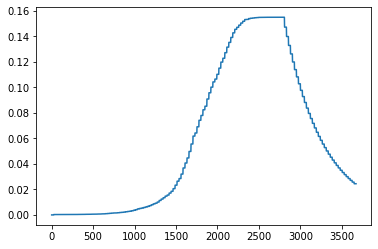

In [7]:
plt.plot(df['c_leaf'])

In [8]:
def leaf_pop_is_growing(prev_leaf_lai, max_leaf_lai, total_emerged_leaves, prev_layer_growing):
    if prev_leaf_lai > max_leaf_lai:
        return False
    if sum(prev_layer_growing) >= total_emerged_leaves:
        return False
    return True
    

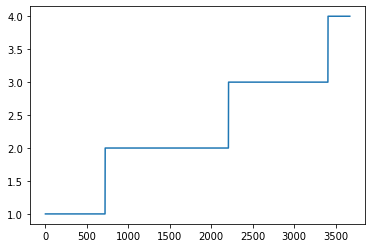

In [9]:
emerged_leaf_count = np.ceil(df["total_emerged_leaves"])
plt.plot(emerged_leaf_count)

In [10]:
# def get_growing_populations(total_emerged_leaves, max_leaf_lai, prev_leaf_lais):
#     """Calculate which leaf populations are still growing"""
#     total_growing_populations = 0
#     growing_populations = [False for _ in range(nP)]
#     for i, iP in enumerate(range(nP)):
#         prev_leaf_lai = prev_leaf_lais[iP]
#         is_growing = True
#         if prev_leaf_lai >= max_leaf_lai:
#             is_growing=False
#         if i >= total_emerged_leaves:
#         # if sum(growing_populations[0:iP]) >= total_emerged_leaves:
#             is_growing=False

#         if is_growing:
#             total_growing_populations += 1
#             growing_populations[iP] = True
        
#     return growing_populations
    

In [136]:
from typing import List
def get_growing_populations(nP: int, td, leaf_population_t_emerg: List[float], leaf_population_t_lems: List[float]) -> List[bool]:
    """Calculate which leaf populations are still growing"""
    growing_populations = [False for _ in range(nP)]
    for iP in range(nP):
        t_emerg = leaf_population_t_emerg[iP]
        t_lem = leaf_population_t_lems[iP]
        growing_populations[iP] = t_emerg < td <= t_emerg + t_lem
        
    return growing_populations

leaf_population_t_emerg = [10, 40, 100, 140]
leaf_population_t_lems = [80, 60, 50, 40]
get_growing_populations(4, 110, leaf_population_t_emerg, leaf_population_t_lems)
    

[False, False, True, False]

In [152]:
leaf_population_t_emerg = np.array([dd for (i, c), dd in zip(enumerate(emerged_leaf_count), df['td_dd']) if i > 2 and c > emerged_leaf_count[i-1]])
nP = len(leaf_population_t_emerg)
leaf_population_t_emerg

array([ 193.63208333,  969.61791667, 1983.60375   ])

In [153]:
last_leaf_t_l = df['td_dd'].iloc[-1] - leaf_population_t_emerg[-1]
print(df['td_dd'].iloc[-1])
print(last_leaf_t_l)
last_leaf_t_lem = last_leaf_t_l * 0.53
leaf_population_t_lems = [last_leaf_t_lem for _ in range(nP)]
leaf_population_t_lems

2194.623333333332
211.01958333333369


[111.84037916666686, 111.84037916666686, 111.84037916666686]

In [154]:
leaf_population_t_lems, nP

([111.84037916666686, 111.84037916666686, 111.84037916666686], 3)

193.6320833333333 111.84037916666686
969.6179166666662 111.84037916666686
1983.6037499999984 111.84037916666686


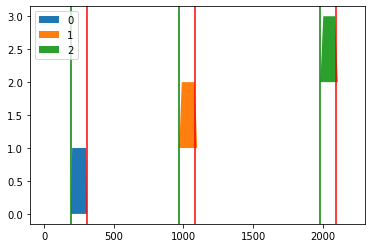

In [155]:
dd_daily = df['dd']
td_daily = df['td_dd']
x = td_daily
a = 0
growing_populations_all = [get_growing_populations(nP, td, leaf_population_t_emerg, leaf_population_t_lems) for td in td_daily]
for i, iP in enumerate(range(nP)):
    b = np.array([g[iP] for g in growing_populations_all])
    # x = np.arange(len(a))
    plt.fill_between(x, i, i + b, label=iP)
    plt.legend()
    
    
for iP in range(nP):
    plt.axvline(leaf_population_t_emerg[iP], c="green")
    plt.axvline(leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], c="red")
    print(leaf_population_t_emerg[iP],leaf_population_t_lems[iP])


In [156]:
growing_tracker = []
max_lai_per_pop=2
nP = len(leaf_population_t_emerg)
lai = df['lai']
leaf_pops_lai = np.zeros((nP,nL, len(lai)))
c_leaf_per_pop_list = np.zeros(len(lai))
dd_daily = df['dd']
td_daily = df['td_dd']
# ==== RUN
for i, (dd, td) in enumerate(zip(dd_daily, td_daily)):
    if i ==0:
        continue # skip first row
    if i == 359:
        continue
    # 1. Find growing leaf count
    prev_leaf_lais = [sum(leaf_pops_lai[iP,:, i-1]) for iP in range(nP)]

    growing_populations = get_growing_populations(nP, td, leaf_population_t_emerg, leaf_population_t_lems)

    growing_tracker.append(growing_populations)
    c_leaf = df["c_leaf"].iloc[i]
    total_growing_populations = sum(growing_populations)
    c_leaf_per_pop = c_leaf/total_growing_populations if total_growing_populations > 0 else 0
    c_leaf_per_pop_list[i] = c_leaf_per_pop
    
    remaining_layer_lai = layers_lai[i,:].copy()
    for iP in range(nP):
        prev_leaf_lai = prev_leaf_lais[iP]
        is_growing = growing_populations[iP]
        new_leaf_lai = prev_leaf_lai + c_leaf_per_pop if is_growing else prev_leaf_lai
        # leaf_pops_lai[iP, 0, i] = new_leaf_lai

        # Split between layers
        remaining_leaf_lai = new_leaf_lai    
        for iL in range(nL):
            layer_lai = remaining_layer_lai[iL]
            if layer_lai > 0:
                f_p_in_layer = min(1, max(0, remaining_leaf_lai/remaining_layer_lai[iL]))
                p_in_layer = remaining_layer_lai[iL] * f_p_in_layer
                remaining_layer_lai[iL] -= p_in_layer
                remaining_leaf_lai -= p_in_layer
                leaf_pops_lai[iP, iL, i] = p_in_layer

In [157]:
pad = lambda a,i : a[0:i] if len(a) > i else a + [0] * (i-len(a))
growing_tracker_padded = np.concatenate((growing_tracker,growing_tracker[0:2]), axis=0)
growing_tracker_padded.shape

(3672, 3)

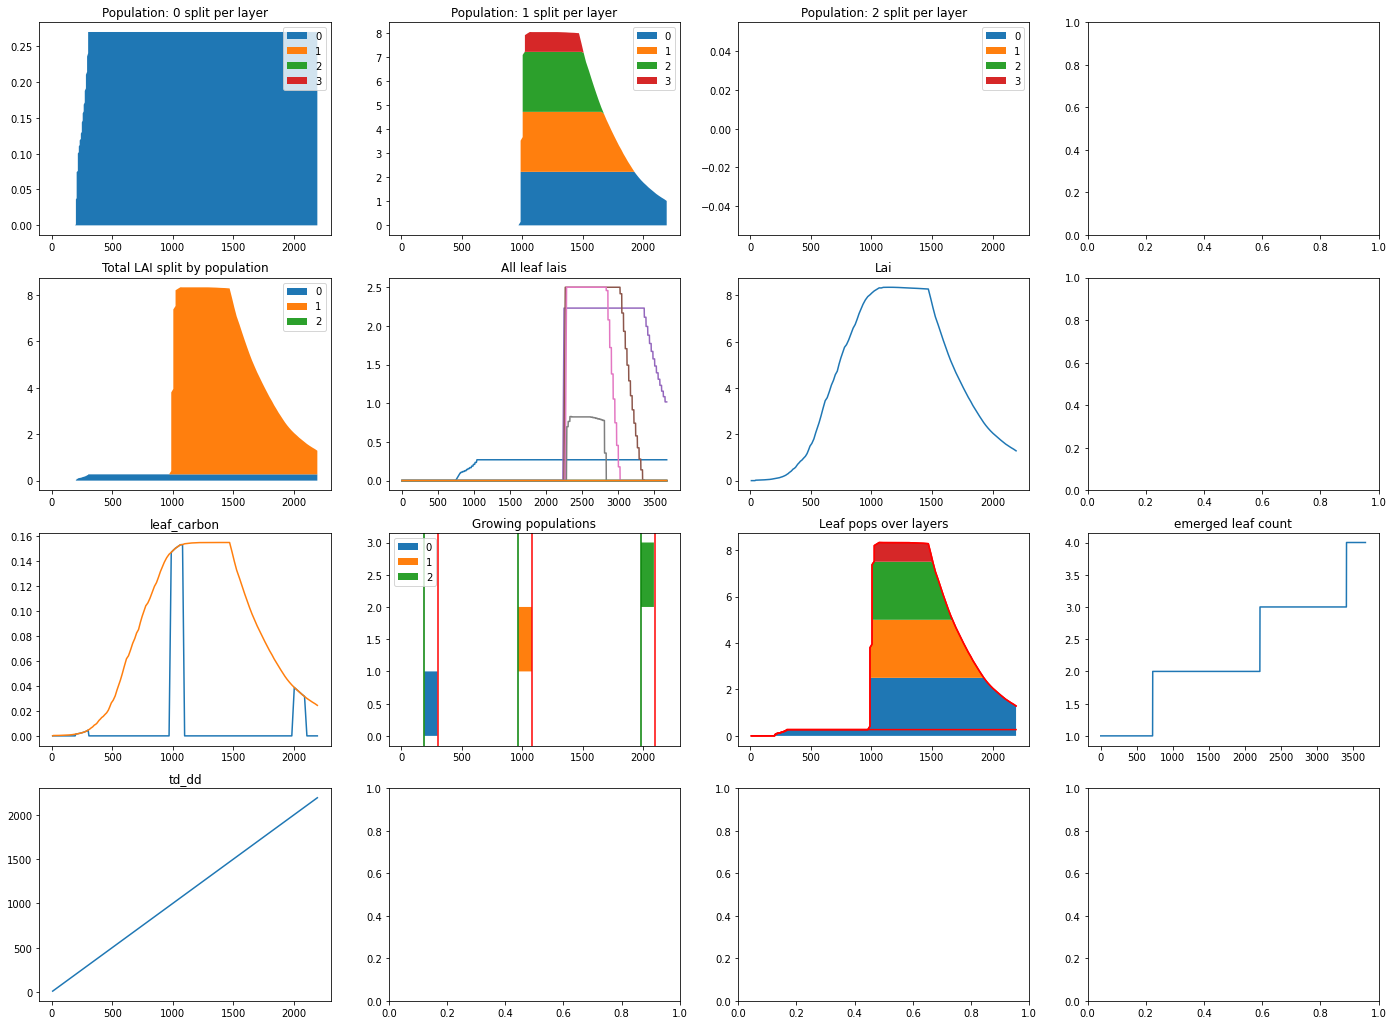

In [160]:

# === PLOT RESULTS =====
fig, axs = plt.subplots(ncols=max(nP, nL), nrows=4, figsize=(24,18))
# x = np.arange(len(lai))
x = df['td_dd']


axs[1][1].set_title("All leaf lais")
for iP in range(nP):
    a = sum(np.sum(leaf_pops_lai[0:iP,:,:],axis=1))
    b = np.sum(leaf_pops_lai[iP,:,:],axis=0)
    axs[1][0].fill_between(x, a, a + b, label=iP)
    axs[1][0].legend()
    axs[1][0].set_title("Total LAI split by population")
    for iL in range(nL):
        a = np.sum(leaf_pops_lai[iP,0:iL,:], axis=0)
        b = leaf_pops_lai[iP,iL,:]
        axs[0][iP].set_title(f"Population: {iP} split per layer")
        axs[0][iP].fill_between(x, a, a + b, label=iL)
        axs[0][iP].legend()
        axs[1][1].plot(leaf_pops_lai[iP,iL,:])

axs[2][0].plot(x, c_leaf_per_pop_list)
axs[2][0].plot(x, df['c_leaf'])
axs[2][0].set_title("leaf_carbon")

axs[2][1].set_title('Growing populations')
for i, iP in enumerate(range(nP)):
    a = np.array([sum(g[0:iP]) for g in growing_tracker_padded])
    b = np.array([g[iP] for g in growing_tracker_padded])
    # x = np.arange(len(a))
    axs[2][1].fill_between(x, i, i + b, label=iP)
    axs[2][1].legend()
    
for iP in range(nP):
    axs[2][1].axvline(leaf_population_t_emerg[iP], c="green")
    axs[2][1].axvline(leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], c="red")

axs[2][2].set_title("Leaf pops over layers")
for iL in range(nL):
    a = sum(np.sum(leaf_pops_lai[:,0:iL,:],axis=1))
    b = np.sum(leaf_pops_lai[:,iL,:],axis=0)
    # x = np.arange(len(a))
    axs[2][2].fill_between(x, a, a + b)
for iP in range(nP):
    a = sum(np.sum(leaf_pops_lai[0:iP,:,:],axis=1))
    b = np.sum(leaf_pops_lai[iP,:,:],axis=0)
    axs[2][2].plot(x, a + b, label=iP, c="red")

axs[2][3].set_title("emerged leaf count")
axs[2][3].plot(emerged_leaf_count)

axs[1][2].set_title("Lai")
axs[1][2].plot(x, lai)


axs[3][0].set_title("td_dd")
axs[3][0].plot(x, df['td_dd'])

In [109]:
growing_tracker_padded[0:10]

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]])

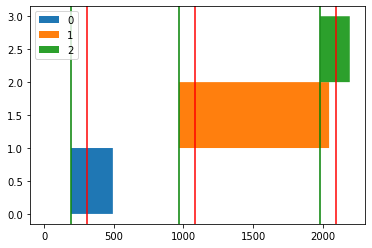